In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

import random
import json
import pickle
import numpy as np
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
ignore_words = ["?", "!"]

# Load the data
try:
    data = open("intents.json", encoding='utf-8').read()
    intents = json.loads(data)
except FileNotFoundError:
    print("Error: data.json file not found.")
    exit()

# Initialize lists
words = []
classes = []
documents = []

# Tokenize and organize the intents
for intent in intents['intents']:
    for pattern in intent['patterns']:
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        documents.append((word, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Lemmatize and sort the words and classes
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

# Debugging print statements
print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique lemmatized words", words)

# Save the words and classes as pickle files
pickle.dump(words, open("words.pkl", "wb"))
pickle.dump(classes, open("classes.pkl", "wb"))

print("Successfully created and saved data...")

# Create training data
training = []
output_empty = [0] * len(classes)

for document in documents:
    bag = []
    pattern_words = document[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for word in words:
        bag.append(1) if word in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1

    training.append([bag, output_row])

# Shuffle the training data
random.shuffle(training)
train_x = list()
train_y = list()

for i in training:
  train_x.append(i[0])
  train_y.append(i[1])

train_x = np.array(train_x)
train_y = np.array(train_y)

# Debugging print statements
print("train_x", len(train_x), train_x)
print("train_y", len(train_y), train_y)
print("Successfully created training data.")


405 documents
38 classes ['admission', 'canteen', 'college intake', 'committee', 'computerhod', 'course', 'creator', 'document', 'event', 'extchod', 'facilities', 'fees', 'floors', 'goodbye', 'greeting', 'hod', 'hostel', 'hours', 'infrastructure', 'ithod', 'library', 'location', 'menu', 'name', 'number', 'placement', 'principal', 'ragging', 'random', 'salutaion', 'scholarship', 'sem', 'sports', 'swear', 'syllabus', 'task', 'uniform', 'vacation']
263 unique lemmatized words ["'s", '(', ')', 'a', 'about', 'ac', 'active', 'activity', 'address', 'admision', 'admission', 'against', 'ai/ml', 'allotment', 'am', 'an', 'and', 'antiragging', 'any', 'anyone', 'are', 'as', 'asshole', 'at', 'attend', 'automobile', 'available', 'average', 'be', 'between', 'big', 'bitch', 'book', 'boy', 'branch', 'bring', 'building', 'by', 'bye', 'cafetaria', 'call', 'called', 'campus', 'can', 'canteen', 'capacity', 'case', 'casuals', 'ce', 'chatting', 'chemical', 'civil', 'code', 'college', 'come', 'committe', 'comm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

# Creating the model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compiling the model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

try:
    # Loading pre-trained model if available
    model = load_model('model.h5')
    print("Successfully loaded model...")
except:
    # Fitting the model if no pre-trained model is found
    hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
    model.save('model.h5')
    print('Successfully created model!!!')

# Display model architecture summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0414 - loss: 3.6203
Epoch 2/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1106 - loss: 3.4359
Epoch 3/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1629 - loss: 3.2260
Epoch 4/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2199 - loss: 2.9534
Epoch 5/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3115 - loss: 2.6297
Epoch 6/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3730 - loss: 2.4127
Epoch 7/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4306 - loss: 2.1750
Epoch 8/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4589 - loss: 1.9492
Epoch 9/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5790 - loss: 1.6969
Epoch 10/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 1.6560
Epoch 11/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 1.3337
Epoch 12/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6364 - lo

Successfully created model!!!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,038 (347.81 KB)

 Trainable params: 44,518 (173.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,520 (173.91 KB)

###Plotting

Successfully loaded model...


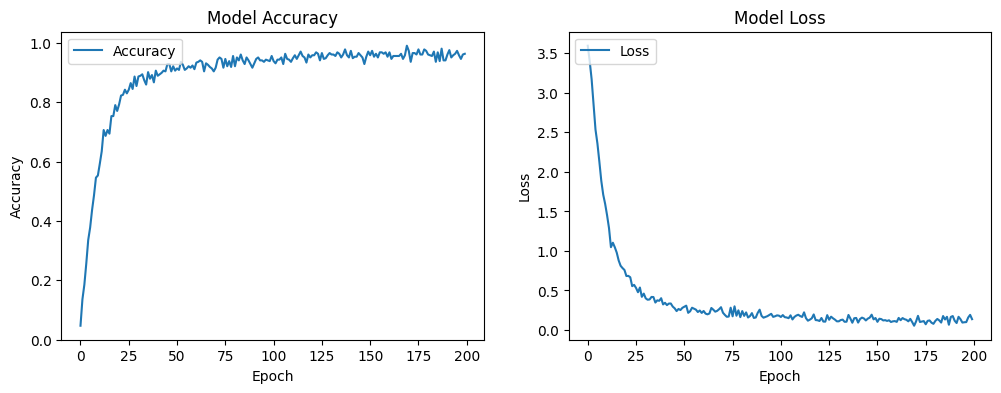

In [ ]:
import matplotlib.pyplot as plt

# Fit the model if no pre-trained model is found
try:
    # Load pre-trained model if available
    model = load_model('model.h5')
    print("Successfully loaded model...")
except:
    # Train the model
    hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
    model.save('model.h5')
    print('Successfully created model!!!')

# Plotting the accuracy and loss
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Plot the history if model is trained
if 'hist' in locals():
    plot_training_history(hist)


### Model Created and Save

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
import json
import random
from keras.models import load_model

In [ ]:
model = load_model("model.h5")
try:
    data = open("merged_json.json", encoding='utf-8').read()
    intents = json.loads(data)
except FileNotFoundError:
    print("Error: data.json file not found.")
    exit()
words = pickle.load(open("words.pkl","rb"))
classes = pickle.load(open("classes.pkl","rb"))

Error: data.json file not found.


In [ ]:
def cleansentences(sentence):
    """
    :param sentence: takes the query ask by client
    :return: list of lemmatizer word
    """
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

In [ ]:
def bow(sentence,words,show_details=False):
    """

    :param sentence: takes the query ask by client
    :param words: takes the words we have pickle, it is the list of tokenized, lemmantized word
    :param show_details: it is the boolean expression
    :return: array of bag of words.
    """
    sentence_words = cleansentences(sentence)
    bag = [0] * len(words)
    # print(words)
    # print(bag)
    for sentences in sentence_words:
        for key,values in enumerate(words):
            # print("key",key,": value",values)
            if values == sentences:
                bag[key] = 1
                if show_details:
                    print("Found in bag : %S" % values)
    # print(bag)
    return (np.array(bag))


In [ ]:
def predictclasses(sentence):
    """

    :param sentence: takes the query ask by client
    :return: list with the word and its probability.
    """
    result = model.predict(np.array([bow(sentence,words)]))[0]
    results = [[key,value] for key,value in enumerate(result)]
    results.sort(key=lambda x: x[1], reverse=True)
    returnlist = list()
    for eachresult in results:
        eachr = [classes[eachresult[0]]],[eachresult[1]]
        returnlist.extend(eachr)
    return returnlist

In [ ]:
def chat():
    while True:
        inp = input("Please enter your query. \n > -  ")
        if inp == "quit":
            break
        results = predictclasses(sentence=inp)
        resultsindex = np.array(results)
        tag = resultsindex[0]
        listofintents = intents['intents']
        for i in listofintents:
            if (i['tag'] == tag):
                result = random.choice(i['responses'])
                break
        print(result)

chat()

Please enter your query. 
 > -  Hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Hello!
Please enter your query. 
 > -  i want to know about admission
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Application can also be submitted online through the Unversity's  <a target="_blank" href="LINK OF ADMISSION DOCUMENT">website</a>
Please enter your query. 
 > -  what about fees
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
For Fee detail visit <a target="_blank" href="LINK"> here</a>
Please enter your query. 
 > -  thank you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
I am glad I helped you
Please enter your query. 
 > -  see you later
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Come back soon
